# AutoEncoder

The AutoEncoder is a very simple neural network and will feel similar to a multi-layer perceptron model. It is designed to reproduce its input at the output layer.

The key difference between an autoencoder and a typical MLP network is that the number of input neurons is equal to the number of output neurons. In some cases, this all comes down to the weights from input to hidden and hidden to ouput layers are **the same, transposed**.

The hidden layer is typicall smaller than the other layers, and it maintains all the information of the input. We can use the hidden layer to extract meaningful features, so we will also explore PCAs with autoencoders.

## Dimensionality Reduction with Linear AutoEncoder

Dimensionality reduction allows us to get a lower dimension representation of our data. The encoder creates new (fewer) features from the input features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=100, n_features=3, centers=2, random_state=101) # Generate isotropic Gaussian blobs for clustering.

In [4]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [5]:
# data[0] is the data, and data[1] is the labels
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data[0])

In [6]:
data_x = scaled_data[:, 0]
data_y = scaled_data[:, 1]
data_z = scaled_data[:, 2]

In [7]:
from mpl_toolkits.mplot3d import Axes3D

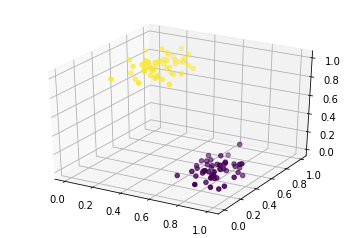

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x, data_y, data_z, c=data[1]);

Two clusters, as we defined, easily separable. Not just that, there is a way to reduce this to only 2 dimensions and still have a clear separation between the class.

In [13]:
import tensorflow as tf

/home/alvaro/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [14]:
from tensorflow.contrib.layers import fully_connected

In [15]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [16]:
learning_rate = 0.01

In [17]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

hidden = fully_connected(X, num_hidden, activation_fn=None)

outputs = fully_connected(hidden, num_outputs, activation_fn=None)

In [18]:
loss = tf.reduce_mean(tf.square(outputs - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [19]:
init = tf.global_variables_initializer()

In [20]:
num_steps = 1000

with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data})

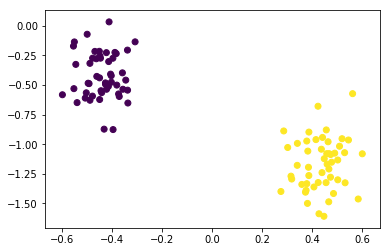

In [24]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c=data[1]);

From 3D to 2D

The interpretation will get harder and harder as we go into deeper and deeper layers